# LightGBM Trees

### LightGBM (Light Gradient Boosting Machine)

A decent chatGPT summary:

**LightGBM** is a fast, distributed, high-performance gradient boosting framework primarily used for machine learning tasks such as classification, regression, and ranking. It is designed to handle large datasets and provides excellent performance for both sparse and dense data. LightGBM stands out due to its efficiency and speed, especially for large-scale datasets.

#### Key Features:
- **Gradient Boosting Framework**: It builds an ensemble of decision trees by sequentially adding trees to correct the errors of previous ones, improving predictive accuracy.
- **Leaf-wise Tree Growth**: Unlike traditional depth-first growth in decision trees, LightGBM grows trees leaf-wise, leading to faster convergence and better accuracy, especially with larger datasets.
- **Categorical Feature Support**: LightGBM supports categorical features directly, eliminating the need for explicit one-hot encoding or other preprocessing steps.
- **Efficient Memory Usage**: The algorithm is optimized to handle large datasets with less memory overhead by using techniques like histogram-based splitting.
- **Distributed Training**: LightGBM supports parallel and GPU learning, making it highly scalable.

#### Key Advantages:
- **Faster Training**: LightGBM uses histogram-based algorithms, which reduces the computational cost during training and makes it faster than other gradient boosting frameworks.
- **Scalable**: Suitable for both small datasets and big data, it can be scaled effectively across machines or GPUs.
- **Automatic Handling of Categorical Data**: LightGBM automatically handles categorical features, simplifying the preprocessing pipeline.

#### Common Use Cases:
- Classification and regression tasks
- Ranking problems, such as in recommendation systems
- Handling large-scale datasets with many features

### The Restaurant dataset

Here we run it on Restaurants. It requires some tweaking to work on a dataset this small. But it does handle categorical features without conversion. Unfort

In [36]:
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Sample synthetic dataset (similar to Restaurant WillWait)
data = pd.read_csv('restaurant2.csv')

# Separate features and target
X = data.drop(columns='WillWait')
y = data['WillWait']

# Convert categorical columns to category dtype
categorical_columns = list(X.columns)
for col in categorical_columns:
    X[col] = X[col].astype('category')

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize LightGBM model
model = lgb.LGBMClassifier(min_child_samples = 1, num_leaves=31, verbosity=-1)

In [37]:
# Train the model
model.fit(X,y, feature_name = list(X.columns)
         , categorical_feature=['Pat'])

LGBMClassifier(min_child_samples=1, verbosity=-1)

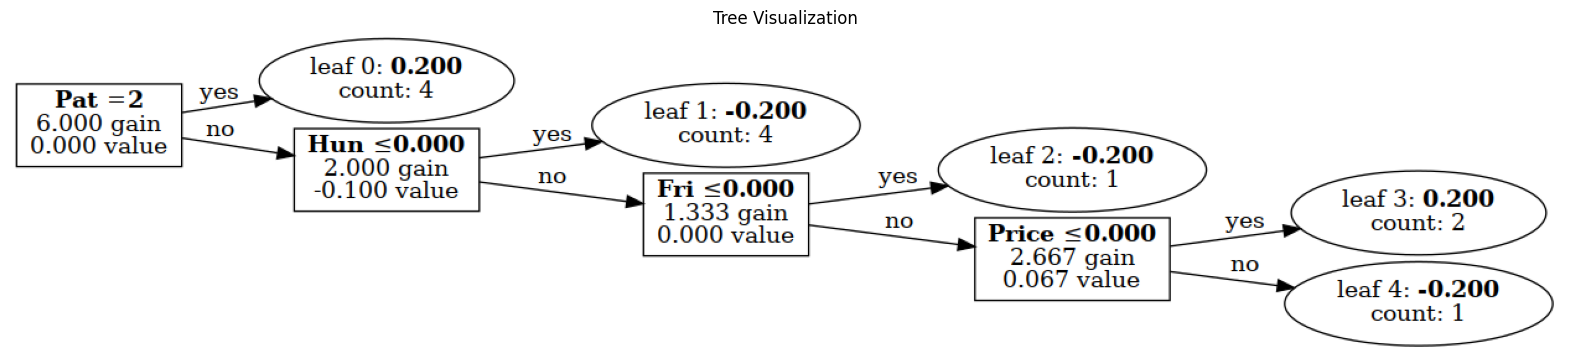

In [38]:
# Plot the first tree in the model
lgb.plot_tree(model, tree_index=0, figsize=(20, 10), show_info=['split_gain', 'internal_value', 'leaf_count'])
plt.title("Tree Visualization")
plt.show()

In [35]:
categorical_columns

Index(['Alt', 'Bar', 'Fri', 'Hun', 'Pat', 'Price', 'Rain', 'Res', 'Type',
       'Est'],
      dtype='object')